# Goal of this script :
-Determine how to exploit voice data
-Familiarize with librairies for audio signal processing

In [99]:
import sys, os
import numpy as np
import pandas
import scipy

#signal processing
from scipy.signal import spectrogram
from numpy.fft import fft, ifft

#work with audio
from pydub import AudioSegment
from pydub.playback import play
from scipy.io import wavfile
import simpleaudio as sa
import librosa

#plot librairies
import matplotlib.pyplot as plt


In [2]:
os.getcwd()

'/home/klegoff/git_synchronized/Projet_digitale/Script'

In [3]:
os.chdir('../Data')

In [4]:
# DATA IMPORT

file = "tedx_viktorovitch.wav" 

#to work with .wavfile : 
samplerate, data = wavfile.read(file)


"""" If we want to work with mp3 file : 
sound = AudioSegment.from_mp3(file)
#play(sound)

# get numerical values
data = np.array(sound.get_array_of_samples())
samplerate = 44100
"""

<ipython-input-4-d7b08f5e9019>:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(file)


'" If we want to work with mp3 file : \nsound = AudioSegment.from_mp3(file)\n#play(sound)\n\n# get numerical values\ndata = np.array(sound.get_array_of_samples())\nsamplerate = 44100\n'

# I- Description of the data

In [5]:
# The data is composed of audio file (.wav or .mp3), sampled à 44100 kHz

print(max(data), min(data)) # range of the amplitude => to normalize / standardize

28967 -32213


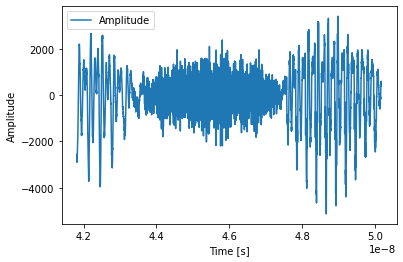

In [6]:
# glimpse of the numerical signal

time =  np.linspace(0, 1/samplerate, data.shape[0])

plt.plot(time[50000:60000], data[50000:60000], label="Amplitude")

plt.legend()

plt.xlabel("Time [s]")

plt.ylabel("Amplitude")

plt.show()

# II- Transform data into spectrogram & vizualization

In [7]:
# we work on a sub sample of the data

N_sec = 0.5 # how short do we need to take ?  (sliding windows of 25ms for ASR)
start_idx = np.random.randint(0, len(data)) # start on random index in the data
end_idx = start_idx + int(N_sec * 44100)

red_data = data[start_idx : end_idx]
#1 second = 44100 values of the numeric array

<ipython-input-8-c81156253096>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, dB)


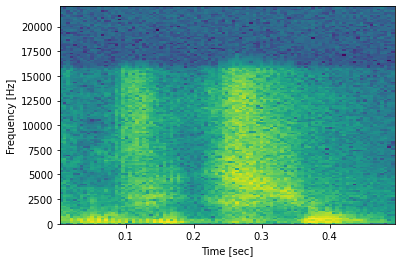

In [8]:
f, t, spectrogramme = spectrogram(red_data, samplerate)

#plot the sonor level of the signal (dB), on each frequency
dB = 10 * np.log10(spectrogramme)

plt.pcolormesh(t, f, dB)

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.show()

In [9]:
# play the sub sample of data, from which we computed the spectrogram
sa.play_buffer(red_data, 1, 2, samplerate)

# III- MFCC feature

In [92]:
N_sec = 0.025 #50 ms window
start_idx = np.random.randint(0, len(data)) # start on random index in the data
end_idx = start_idx + int(N_sec * 44100)

sample = data[start_idx:end_idx]

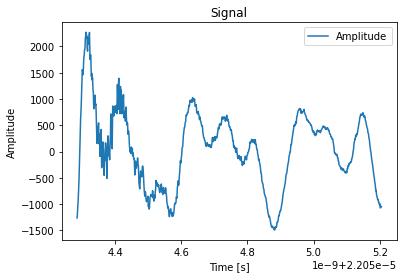

In [93]:
# plot the sample we work on
plt.plot(time[start_idx:end_idx], sample, label="Amplitude")

plt.title("Signal")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

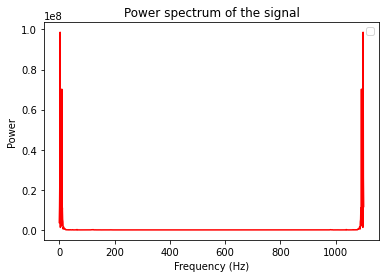

In [97]:
# 1. compute discrete Fourrier transform (DFT) of the signal, on a selected winow

y = fft(sample) # fft results contains complex numbers (which stands for phase + amplitude information, so we need to take the abs value

y = (abs(y)**2)/len(y) # convert DFT to the power spectral density (PSD)

plt.plot(y,'r')
plt.title("Power spectrum of the signal")
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.show()

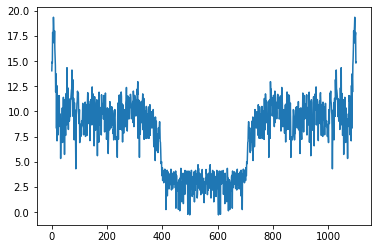

In [86]:
# 2. apply log to the amplitude

y = np.log(y)

plt.plot(y) 

plt.title("Log-power spectrum of the signal")
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()

# side effects because of sampling ? probably

/home/klegoff/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


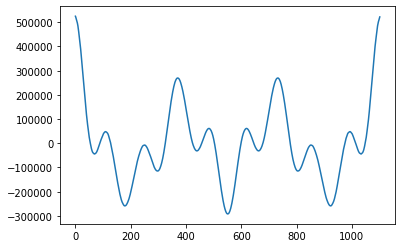

In [98]:
# 3. apply reverse Fourrier Transformation

y = ifft(y)

plt.plot(y) 


In [ ]:
# implement the MFCC

def compute_mfcc(signal):
    return signal

In [105]:
x, sr= librosa.load(file)

In [106]:
mfccs = librosa.feature.mfcc(x, sr=sr)